In [35]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [95]:
import cv2

CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,30,0.001)

objpoints = []
imgpoints = []

objp = np.zeros((1,CHECKERBOARD[0]*CHECKERBOARD[1],3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0],0:CHECKERBOARD[1]].T.reshape(-1,2)
prev_img_shape = None
print(objp)
images = "C:/sem 6/cv/assignment2/images2"
path1 = "C:/sem 6/cv/assignment2/images2/1.jpg"
for fname in os.listdir(images):
    path = os.path.join(images, fname)
    img = cv2.imread(path)
 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD,  cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        objpoints.append(objp)
        print(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)

        imgpoints.append(corners2)

        img2 = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    
    cv2.imshow("img",img2)
    cv2.waitKey(0)

cv2.destroyAllWindows()

h, w = img.shape[:2]

ret1, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


[[[0. 0. 0.]
  [1. 0. 0.]
  [2. 0. 0.]
  [3. 0. 0.]
  [4. 0. 0.]
  [5. 0. 0.]
  [0. 1. 0.]
  [1. 1. 0.]
  [2. 1. 0.]
  [3. 1. 0.]
  [4. 1. 0.]
  [5. 1. 0.]
  [0. 2. 0.]
  [1. 2. 0.]
  [2. 2. 0.]
  [3. 2. 0.]
  [4. 2. 0.]
  [5. 2. 0.]
  [0. 3. 0.]
  [1. 3. 0.]
  [2. 3. 0.]
  [3. 3. 0.]
  [4. 3. 0.]
  [5. 3. 0.]
  [0. 4. 0.]
  [1. 4. 0.]
  [2. 4. 0.]
  [3. 4. 0.]
  [4. 4. 0.]
  [5. 4. 0.]
  [0. 5. 0.]
  [1. 5. 0.]
  [2. 5. 0.]
  [3. 5. 0.]
  [4. 5. 0.]
  [5. 5. 0.]
  [0. 6. 0.]
  [1. 6. 0.]
  [2. 6. 0.]
  [3. 6. 0.]
  [4. 6. 0.]
  [5. 6. 0.]
  [0. 7. 0.]
  [1. 7. 0.]
  [2. 7. 0.]
  [3. 7. 0.]
  [4. 7. 0.]
  [5. 7. 0.]
  [0. 8. 0.]
  [1. 8. 0.]
  [2. 8. 0.]
  [3. 8. 0.]
  [4. 8. 0.]
  [5. 8. 0.]]]
[[[0. 0. 0.]
  [1. 0. 0.]
  [2. 0. 0.]
  [3. 0. 0.]
  [4. 0. 0.]
  [5. 0. 0.]
  [0. 1. 0.]
  [1. 1. 0.]
  [2. 1. 0.]
  [3. 1. 0.]
  [4. 1. 0.]
  [5. 1. 0.]
  [0. 2. 0.]
  [1. 2. 0.]
  [2. 2. 0.]
  [3. 2. 0.]
  [4. 2. 0.]
  [5. 2. 0.]
  [0. 3. 0.]
  [1. 3. 0.]
  [2. 3. 0.]
  [3. 3. 0.]
  [4. 3. 0

In [37]:
print(ret1)

2.2044067456104623


In [38]:
if ret1: 
    focal_length_x = mtx[0, 0]  
    focal_length_y = mtx[1, 1]  
    principal_point_x = mtx[0, 2]  
    principal_point_y = mtx[1, 2]  
    skew = mtx[0, 1] 

    print("Focal Length (x, y):", focal_length_x, focal_length_y)
    print("Principal Point:", principal_point_x, principal_point_y)
    print("Skew:", skew)
else:
    print("Calibration failed!")

Focal Length (x, y): 944.4698614260614 943.3663655595952
Principal Point: 650.1710388473065 476.40146082170287
Skew: 0.0


In [39]:
if ret1:
  for i in range(len(objpoints)):
    print(f"Image {i+1}:")
    rvec = rvecs[i]
    tvec = tvecs[i]
    
    print("Rotation Vector:", rvec.flatten())  
    print("Translation Vector:", tvec.flatten())  
else:
  print("Calibration failed!")

Image 1:
Rotation Vector: [ 0.15708191  0.18054337 -1.59159547]
Translation Vector: [-2.83551177  2.54751943 10.40365217]
Image 2:
Rotation Vector: [ 0.48604906  0.51403931 -1.53216908]
Translation Vector: [-3.93311145  1.69123117 12.62930112]
Image 3:
Rotation Vector: [-0.2623289  -0.27391756 -1.51228119]
Translation Vector: [-4.44471016  0.15314807 11.76438105]
Image 4:
Rotation Vector: [-0.05545453  0.27181625 -1.09165755]
Translation Vector: [-7.49662967  0.95675015 14.43728482]
Image 5:
Rotation Vector: [-0.02807289  0.08483746  0.66295439]
Translation Vector: [-2.40830608 -1.90067725 13.83589721]
Image 6:
Rotation Vector: [ 0.313694    0.31798799 -2.36636881]
Translation Vector: [-0.82619491  3.73714408 16.66287132]
Image 7:
Rotation Vector: [ 0.07509895  0.12015679 -2.00247624]
Translation Vector: [-6.4014899   7.40920875 17.23696507]
Image 8:
Rotation Vector: [ 0.08983488  0.13141848 -1.59155782]
Translation Vector: [-3.92038684  2.75576613 11.45755651]
Image 9:
Rotation Vector

In [40]:
if ret1:
  print("Radial Distortion Coefficients:")
  print(dist.flatten())  # Print flattened array
else:
  print("Calibration failed!")

Radial Distortion Coefficients:
[ 0.1664366  -0.79993009  0.00619021 -0.00592735  1.02267459]


In [96]:
def undistort_image(img, mtx, dist):
  h, w = img.shape[:2]
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
  undistorted_img = cv2.undistort(img, mtx, dist, None, newcameramtx)
  return undistorted_img

# After calibration...
images = "C:/sem 6/cv/assignment2/images2"
for i in range(5):  # Undistort the first 5 images
  img_path = os.path.join(images, f"{i+1}.jpg")  # Assuming image naming convention
  img = cv2.imread(img_path)

  undistorted_img = undistort_image(img, mtx, dist)

  # Display or save the undistorted image (add logic as needed)
  cv2.imshow("Undistorted Image", undistorted_img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()


In [97]:
def calculate_reprojection_error(objpoints, imgpoints, mtx, dist, rvecs, tvecs):
    reprojection_errors = []
    for i in range(len(objpoints)):
        objp = objpoints[i]
        imgp = imgpoints[i]
        rvec = rvecs[i]
        tvec = tvecs[i]
    
        # Project 3D points using estimated parameters
        imgpoints2, _ = cv2.projectPoints(objp, rvec, tvec, mtx, dist)
    
        # Calculate reprojection error (distance between actual and projected points)
        error = cv2.norm(imgp,imgpoints2, cv2.NORM_L2)
    
        # Average error per corner for this image
        avg_error = np.mean(error)
        reprojection_errors.append(avg_error)
        image = cv2.imread("C:/sem 6/cv/assignment2/images2/" + os.listdir("C:/sem 6/cv/assignment2/images2")[i])

        imgpoints2 = np.int32(imgpoints2).reshape(-1, 2)
        for j in range(len(imgpoints2)):
            cv2.circle(image, (imgpoints2[j][0], imgpoints2[j][1]), 3, (0, 255, 0), -1)

        # Print the reprojection error for this image
        # print(f"Image {i+1} reprojection error: {error:.4f}")
        cv2.imshow("image with reprojected corners", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    return reprojection_errors

# After successful calibration...
reprojection_errors = calculate_reprojection_error(objpoints, imgpoints, mtx, dist, rvecs, tvecs)


Mean Reprojection Error: 12.316757902741989 pixels
Standard Deviation: 10.521671762275783 pixels


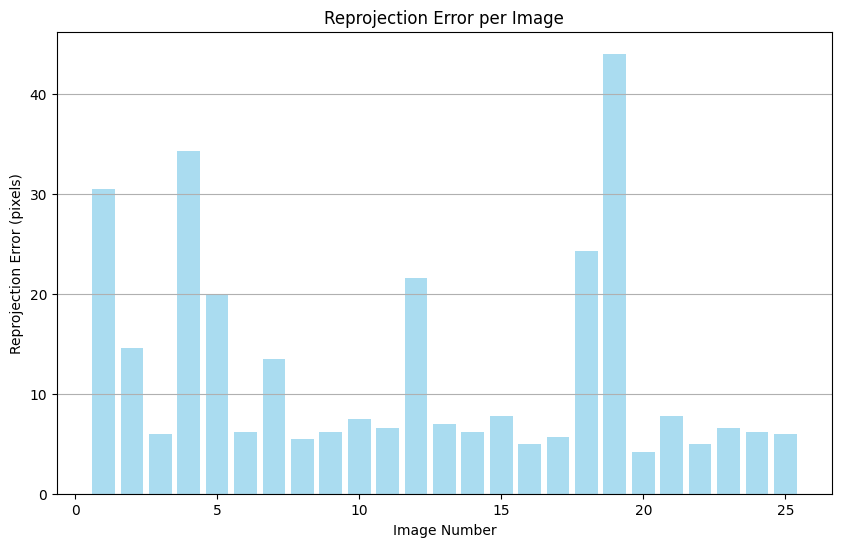

In [43]:
import matplotlib.pyplot as plt

# Calculate mean and standard deviation
mean_error = np.mean(reprojection_errors)
std_dev = np.std(reprojection_errors)

print("Mean Reprojection Error:", mean_error, "pixels")
print("Standard Deviation:", std_dev, "pixels")

# Prepare data for bar chart
image_numbers = range(1, len(reprojection_errors) + 1)  # Assuming image numbering starts from 1

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(image_numbers, reprojection_errors, color='skyblue', alpha=0.7)
plt.xlabel("Image Number")
plt.ylabel("Reprojection Error (pixels)")
plt.title("Reprojection Error per Image")
plt.grid(axis='y')
plt.show()


In [98]:
def calculate_reprojection_error(objpoints, imgpoints, mtx, dist, rvecs, tvecs):
    reprojection_errors = []
    for i in range(len(objpoints)):
        objp = objpoints[i]
        imgp = imgpoints[i]
        rvec = rvecs[i]
        tvec = tvecs[i]
    
        # Project 3D points using estimated parameters
        imgpoints2, _ = cv2.projectPoints(objp, rvec, tvec, mtx, dist)
    
        # Calculate reprojection error (distance between actual and projected points)
        error = cv2.norm(imgp,imgpoints2, cv2.NORM_L2)
    
        # Average error per corner for this image
        image = cv2.imread("C:/sem 6/cv/assignment2/images2/" + os.listdir("C:/sem 6/cv/assignment2/images2")[i])
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

        if ret == True:
            corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
            corners2 = np.int32(np.array(np.mat(corners2))).reshape(-1,2)
            imgpoints2 = np.int32(imgpoints2).reshape(-1, 2)
            # print("corners2",(corners2[0]))
            # print("imagepoints")
            # print((imgpoints2[0]))
            for j in range(len(imgpoints2)):
                cv2.circle(image, (imgpoints2[j][0], imgpoints2[j][1]), 3, (0, 255, 0), -1)
            for j in range(len(corners2)):
                cv2.circle(image, (corners2[j][0], corners2[j][1]), 3, (0, 0, 255), -1)

        # Print the reprojection error for this image
        # print(f"Image {i+1} reprojection error: {error:.4f}")
        cv2.imshow("image with reprojected corners", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    return reprojection_errors

# After successful calibration...
reprojection_errors = calculate_reprojection_error(objpoints, imgpoints, mtx, dist, rvecs, tvecs)


In [94]:
import cv2
import numpy as np

CHECKERBOARD = (6, 9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
images_path = "C:/sem 6/cv/assignment2/images2"
square_size = 10  # Assuming a square size of 10mm on the checkerboard

image_data = []
for filename in os.listdir(images_path):
  image_path = os.path.join(images_path, filename)

  # Process the image
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

  if ret:
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)  # Removed unused criteria

    world_points = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
    world_points[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
    world_points = world_points * square_size

    # Perform calibration for this image (replace with your calibration logic)
    ret, mtx_i, dist_i, rvec_i, tvec_i = cv2.calibrateCamera([world_points], [corners2], gray.shape[::-1], None, None)

    imgpoints2, _ = cv2.projectPoints(world_points, rvec_i, tvec_i, mtx_i, dist_i)
    error = cv2.norm(corners2, imgpoints2, cv2.NORM_L2)

    point1 = world_points[0]
    point2 = world_points[CHECKERBOARD[0] - 1]
    point3 = world_points[CHECKERBOARD[1] * (CHECKERBOARD[0] - 1)]

    normal_world = np.cross(point2 - point1, point3 - point1)
    normal_camera = np.dot(cv2.Rodrigues(rvec_i)[0].T, normal_world)  # Assuming rotation matrix from Rodrigues

    img_with_corners = cv2.drawChessboardCorners(img.copy(), corners2, ret, (CHECKERBOARD[0], CHECKERBOARD[1]))
    image_data.append((img_with_corners, error, normal_camera))

  else:
    print(f"Failed to find chessboard corners in {image_path}")




error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'projectPoints'
> Overload resolution failed:
>  - rvec is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'rvec'
